# Text Classification with 20 Newsgroups Dataset using RNN and LSTM

This notebook demonstrates how to perform text classification using both RNN and LSTM models on the 20 Newsgroups dataset.

### Step 1: Install TensorFlow

In [1]:
!pip install tensorflow

### Step 2: Import Libraries

In [8]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout

### Step 3: Load and Preprocess the Dataset

In [3]:
# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

# Preprocess the data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(newsgroups.data)
sequences = tokenizer.texts_to_sequences(newsgroups.data)
X = pad_sequences(sequences, maxlen=200)
y = to_categorical(newsgroups.target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: Build and Compile the RNN Model

In [17]:
# Build the RNN model
rnn_model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=200),
    SimpleRNN(units=64),
    Dropout(0.2),  # added dropout layer with 20% dropout rate
    Dense(64, activation='relu'),
    tf.keras.layers.Dense(20, activation='sigmoid')
])

rnn_model.compile(
    loss='binary_crossentropy',  # changed loss function to binary_crossentropy
    optimizer='adam',
    metrics=['accuracy']
)

rnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Step 5: Build and Compile the LSTM Model

In [20]:
# Build the LSTM model

lstm_model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=200),
    LSTM(units=64),
    Dropout(0.2),
    Dense(64, activation='relu'),
    tf.keras.layers.Dense(20, activation='sigmoid')
])

lstm_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


lstm_model.summary()



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Step 6: Train the RNN Model

In [18]:
# Train the RNN model
history_rnn = rnn_model.fit(
    X_train,
    y_train,
    epochs=7,
    batch_size = 20,
    validation_data=(X_test, y_test)
)


Epoch 1/7
754/754 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.0639 - loss: 0.2470 - val_accuracy: 0.2814 - val_loss: 0.1763
Epoch 2/7
754/754 ━━━━━━━━━━━━━━━━━━━━ 78s 77ms/step - accuracy: 0.3795 - loss: 0.1594 - val_accuracy: 0.4019 - val_loss: 0.1492
Epoch 3/7
754/754 ━━━━━━━━━━━━━━━━━━━━ 84s 80ms/step - accuracy: 0.6301 - loss: 0.1024 - val_accuracy: 0.4496 - val_loss: 0.1416
Epoch 4/7
754/754 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - accuracy: 0.7942 - loss: 0.0643 - val_accuracy: 0.4562 - val_loss: 0.1611
Epoch 5/7
754/754 ━━━━━━━━━━━━━━━━━━━━ 80s 76ms/step - accuracy: 0.8803 - loss: 0.0416 - val_accuracy: 0.4650 - val_loss: 0.1772
Epoch 6/7
754/754 ━━━━━━━━━━━━━━━━━━━━ 85s 81ms/step - accuracy: 0.9134 - loss: 0.0295 - val_accuracy: 0.4584 - val_loss: 0.1949
Epoch 7/7
754/754 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.9369 - loss: 0.0231 - val_accuracy: 0.4541 - val_loss: 0.2136


### Step 7: Train the LSTM Model

In [ ]:
# Train the LSTM model
history_lstm = lstm_model.fit(
    X_train,
    y_train,
    epochs=7,
    batch_size = 20,
    validation_data=(X_test, y_test)
)

Epoch 1/7
754/754 ━━━━━━━━━━━━━━━━━━━━ 114s 145ms/step - accuracy: 0.1385 - loss: 2.6889 - val_accuracy: 0.3820 - val_loss: 1.8003
Epoch 2/7
754/754 ━━━━━━━━━━━━━━━━━━━━ 137s 138ms/step - accuracy: 0.4713 - loss: 1.5542 - val_accuracy: 0.5271 - val_loss: 1.4744
Epoch 3/7
754/754 ━━━━━━━━━━━━━━━━━━━━ 106s 140ms/step - accuracy: 0.6391 - loss: 1.0694 - val_accuracy: 0.5928 - val_loss: 1.2729
Epoch 4/7
754/754 ━━━━━━━━━━━━━━━━━━━━ 140s 137ms/step - accuracy: 0.7501 - loss: 0.7657 - val_accuracy: 0.6812 - val_loss: 1.0679
Epoch 5/7
608/754 ━━━━━━━━━━━━━━━━━━━━ 19s 135ms/step - accuracy: 0.8486 - loss: 0.4910

### Step 8: Evaluate the Models

In [24]:
# Evaluate the models
rnn_eval = rnn_model.evaluate(X_test, y_test)
lstm_eval =lstm_model.evaluate(X_test, y_test)


118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.4444 - loss: 0.2194
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.7146 - loss: 1.1392


### Step 9: Plot the Training and Validation Accuracy/Loss

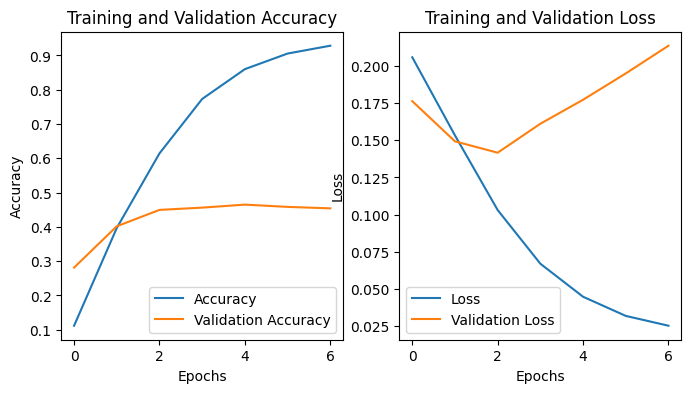

In [27]:
# Training history
history_dict = history_rnn.history

# Seperating validation and training accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Seperating validation and training loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plotting
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation Loss'])

plt.show()

### Step 10: Classify a Sample Text

In [29]:
# Step 10: Classify a Sample Text


sample_text = "This is a sample text for classification."


sample_seq = tokenizer.texts_to_sequences([sample_text])
sample_padded = pad_sequences(sample_seq, maxlen=200)

# Make predictions using the RNN model
rnn_pred = rnn_model.predict(sample_padded)
rnn_class = np.argmax(rnn_pred)

# Make predictions using the LSTM model
lstm_pred = lstm_model.predict(sample_padded)
lstm_class = np.argmax(lstm_pred)

print("RNN Model Prediction:", rnn_class)
print("LSTM Model Prediction:", lstm_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
RNN Model Prediction: 15
LSTM Model Prediction: 7


#**Well done =)**